## Librairie

In [7]:
import numpy as numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy 
from scipy.stats import binomtest

print("pandas version:" ,pd.__version__)
print("matplotlib version:" ,matplotlib.__version__)
print("seaborn version:" ,sns.__version__)
print("scipy versiion:" , scipy.__version__)

pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2
scipy versiion: 1.13.1


## Data

In [8]:
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Tour d'horizon

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
df.nunique()

df["time"].unique().tolist()

['Dinner', 'Lunch']

## Types de variables et comprehension du dataset 

### variables discretes: 
- sex : le sexe du client (homme ou femme)

- smoker : le client est fumeur ou pas

- day : le jour de la semaine où le client est venu

- time : le type de repas, le matin (lunch) ou la soirée (le dinner)

- size : le nombre de place dont dispose la table du client 

### Variables continues :
- total_bill : le total des depenses effectuése par le client

- tip : le pourboire donner par le client


## BinomTest ( sur le pourboire ("tip") )

H0: "80% des pourboires sont donnés le soir"

In [45]:
p=  0.8

In [63]:
df["time"].value_counts(normalize=True)
k=df["time"].value_counts()["Dinner"]
k

176

<Axes: xlabel='time'>

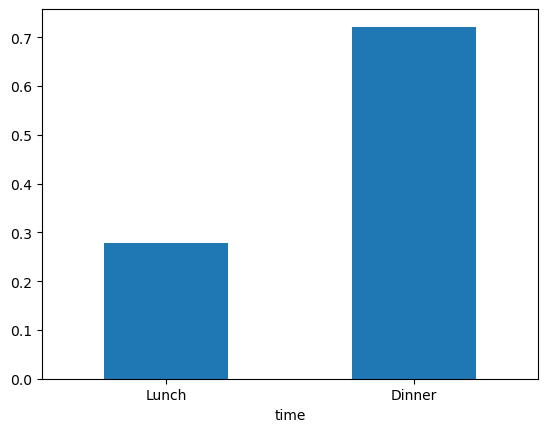

In [60]:
df["time"].value_counts(normalize=True).sort_values().plot(kind="bar",rot=0)

In [54]:
n=len(df["time"])
n

244

In [97]:
bt=binomtest(k=k,n=n,p=p)
bt
print(dir(bt))
type(bt)
bt.__l

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'alternative', 'k', 'n', 'proportion_ci', 'proportion_estimate', 'pvalue', 'statistic']


{'k': 176,
 'n': 244,
 'alternative': 'two-sided',
 'statistic': 0.7213114754098361,
 'pvalue': 0.002988997747005771,
 'proportion_estimate': 0.7213114754098361}

## En Résumé : 

In [98]:
p = 0.8
print(f"H0: \"{p*100} % des pourboires sont données le soir\"")

alpha = 0.02
p_value= binomtest(k=k,n=n,p=p).pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(6)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(6)}")   


H0: "80.0 % des pourboires sont données le soir"
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.002989


Axes(0.125,0.11;0.775x0.77)


C:\Users\franc\AppData\Local\Temp\ipykernel_4860\3473250311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( df.groupby("time")["tip"].describe().plot(kind="bar") )


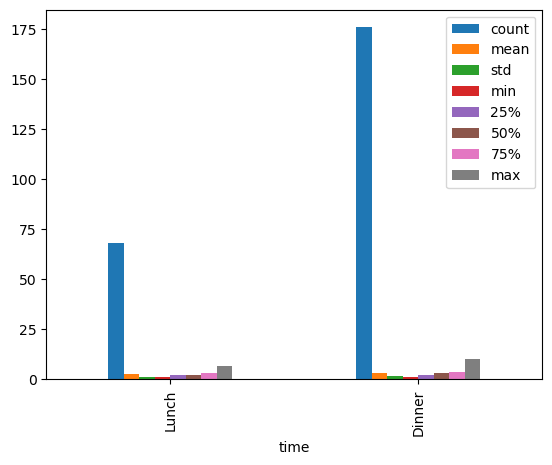

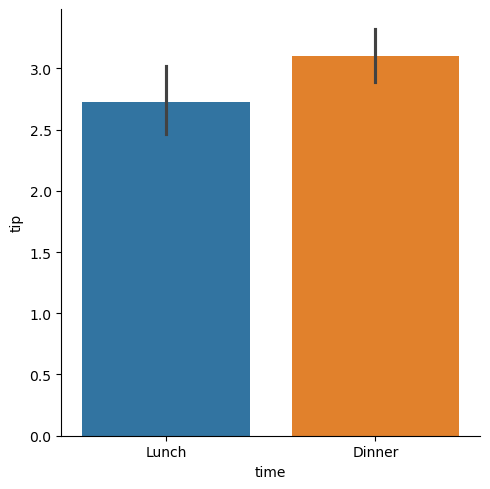

In [77]:
#df.groupby("time")["tip"].value_counts(normalize=True).reset_index().value_counts().plot(kind="bar")

print( df.groupby("time")["tip"].describe().plot(kind="bar") )

sns.catplot(data=df , x="time" ,y="tip",kind="bar",hue="time")

